 '''
Steps:
1. I transformed all string values (columns "sex", ''smoke'', ''region'') into numeric ones and dropped strings with null values (nothing changed).
2. To see the correlation between values I used corr() function.
3. To predict the charges I defined x and y values. Y ('charges') is our goal that we need to predict, x - others values in dataset.
4. I divided our dataset on train and test parts in dimension 70/30.
5. Train part I used to train models and test part is for predictions and evaluation the quality of model.
6. As model I used 4 regression functions from sklearn: LinearRegression, Ridge, GradientBoostingRegressor, RandomForestRegressor.
7. The quality of model I evaluated using R2 score.

Some conclusions:
1. GradientBoostingRegressor model is the best, its quality is 86,61%
2. The biggest impact on prediction has the fact if a person is smoker or not. Factors 'age' and 'smoker' together have the biggest impact on charges.
'''


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score
 
data = pd.read_csv('E:\Новая папка\ds_internship_task\insurance.csv')

data.loc[data.sex=='male','sex']=0
data.loc[data.sex=='female','sex']=1
data.loc[data.smoker=='yes','smoker']=1
data.loc[data.smoker=='no','smoker']=0
data.loc[data.region=='southwest','region']=1
data.loc[data.region=='northwest','region']=0
data.loc[data.region=='southeast','region']=2
data.loc[data.region=='northeast','region']=3
data.dropna()

data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.002613,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.009346,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.054428,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.036617,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.044124,0.787251
region,-0.002613,-0.009346,0.054428,-0.036617,0.044124,1.000000,0.050226
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.050226,1.000000


In [18]:
y = np.array(data.charges)
x = np.array(data.iloc[:,:6])
 
 
x_train, x_test, y_train,y_test = train_test_split (x,y,test_size = 0.30, random_state = 241)

models = [GradientBoostingRegressor(), LinearRegression(), RandomForestRegressor(),Ridge()]
results = []
for i in models:
  clf = i
  clf.fit(x_train,y_train)
  r2 = r2_score(y_test, clf.predict(x_test))
  results.append(r2)
results

E:\Python2\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.8660674929081995,
 0.7596067878882117,
 0.8493059341878695,
 0.7588719683693892]

Text(0, 0.5, 'quality')

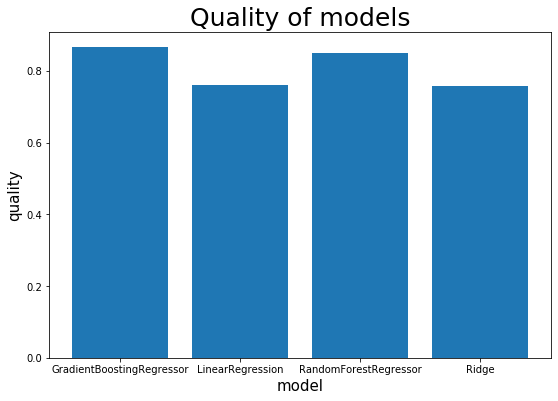

In [19]:
y_1 = results
x_1 = ['GradientBoostingRegressor','LinearRegression','RandomForestRegressor','Ridge']
plt.figure(figsize=(9,6))
plt.bar(x_1,y_1)
plt.title ('Quality of models', fontsize = 25)
plt.xlabel('model', fontsize = 15)
plt.ylabel('quality',fontsize = 15)

In [20]:
best_clf = GradientBoostingRegressor(random_state = 200)
best_clf.fit(x_train,y_train)
best_clf.feature_importances_ # showes the weights of each factor 

array([0.12976238, 0.00067579, 0.20042831, 0.01056383, 0.65404983,
       0.00451986])